In [11]:
library(LaplacesDemon)
library(ggplot2)
library(Hmisc)
library(minpack.lm)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(dHSIC)
library(mgcv)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::partial()   masks LaplacesDemon::partial()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:survival’:

    cluster



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading

In [10]:
install.packages(c("dHSIC", "mgcv"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] -0.06285448 18.27349087

[1] -0.06285448 18.27349087

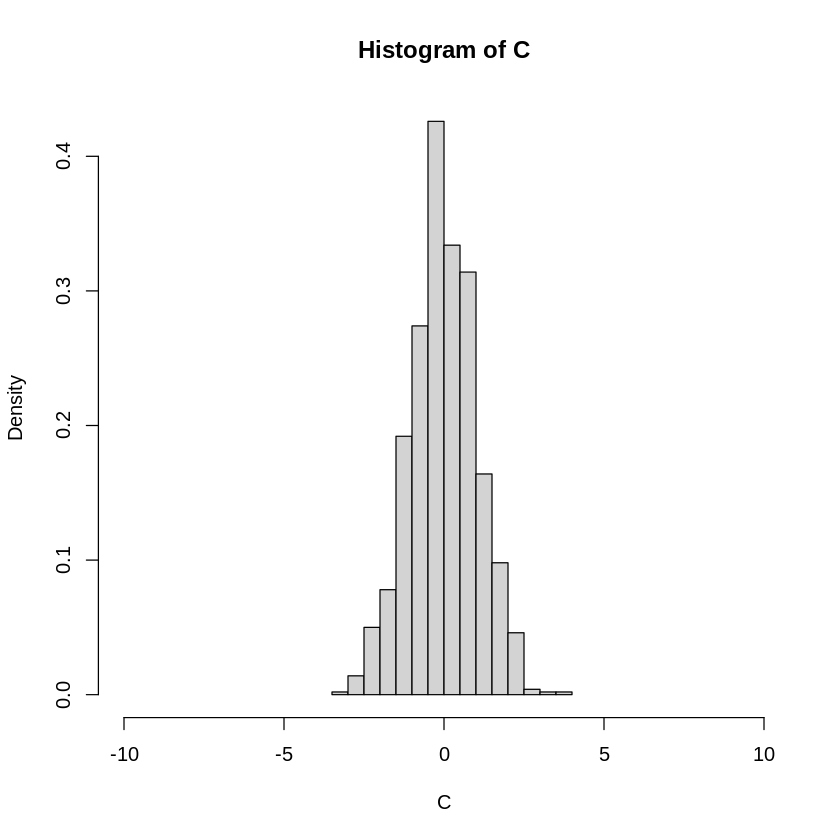

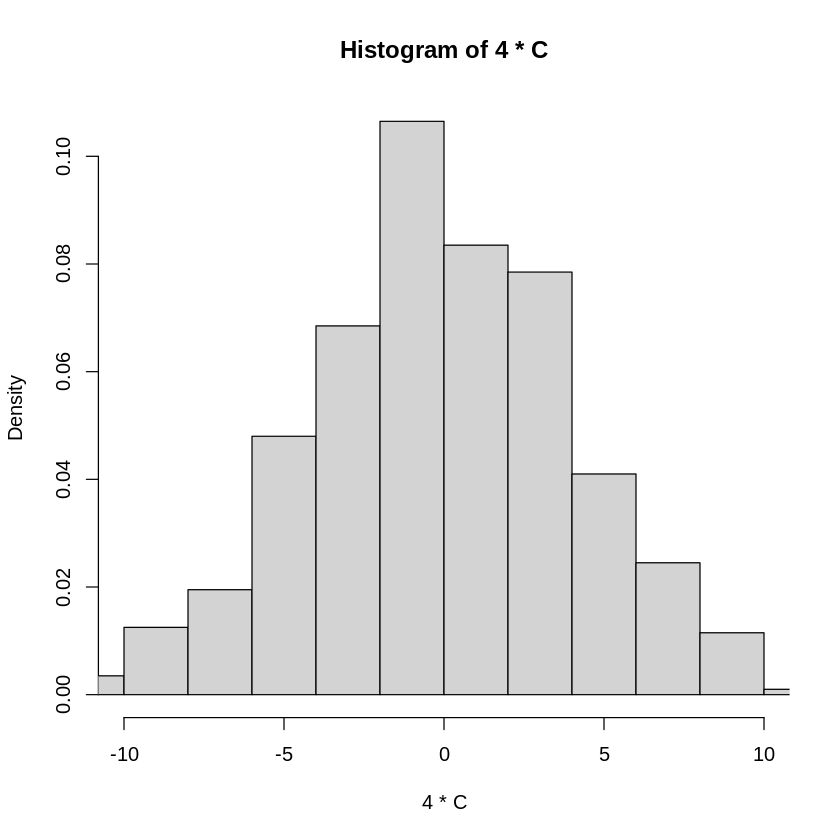

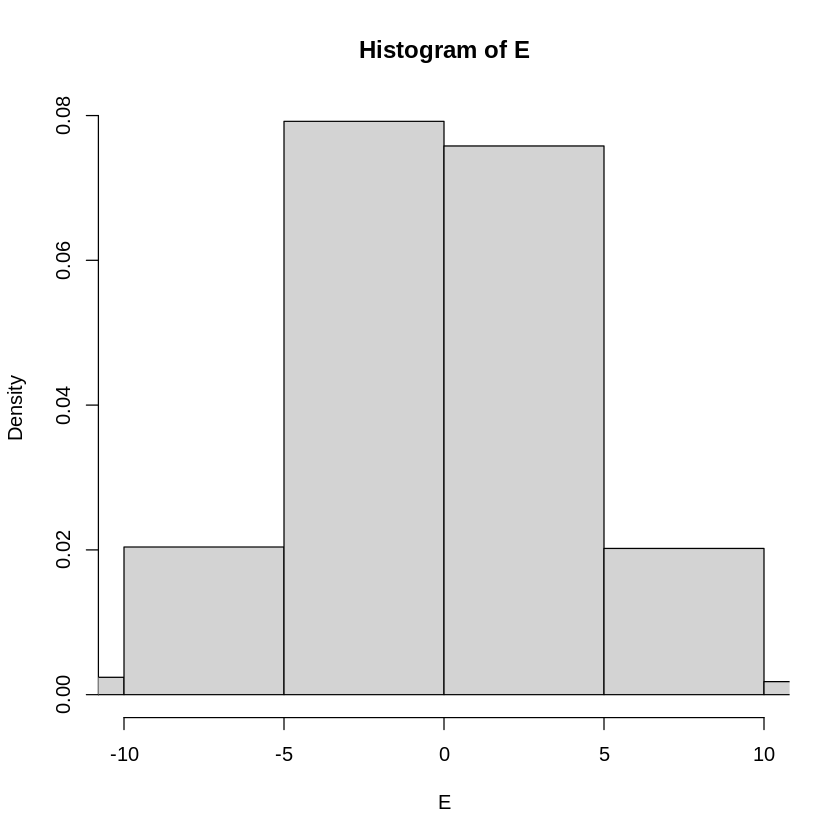


Call:
lm(formula = Y ~ X, data = data.frame(X, Y))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4734 -0.7174  0.0143  0.6807  2.3088 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0007206  0.0567289  -0.013     0.99    
X            0.5468781  0.0541706  10.095   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9818 on 298 degrees of freedom
Multiple R-squared:  0.2548,	Adjusted R-squared:  0.2523 
F-statistic: 101.9 on 1 and 298 DF,  p-value: < 2.2e-16


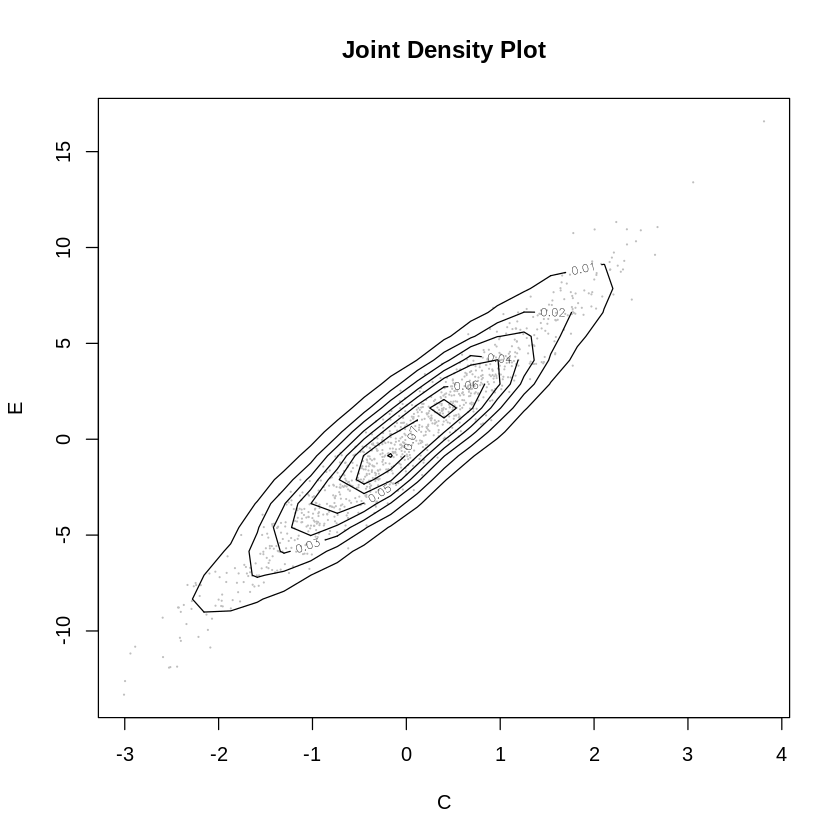

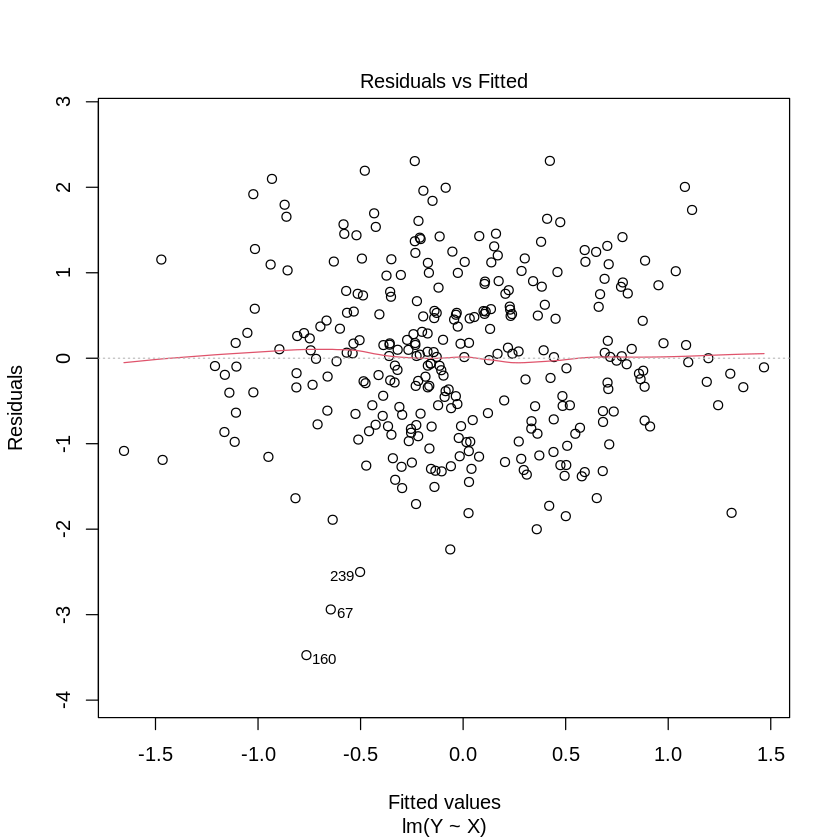

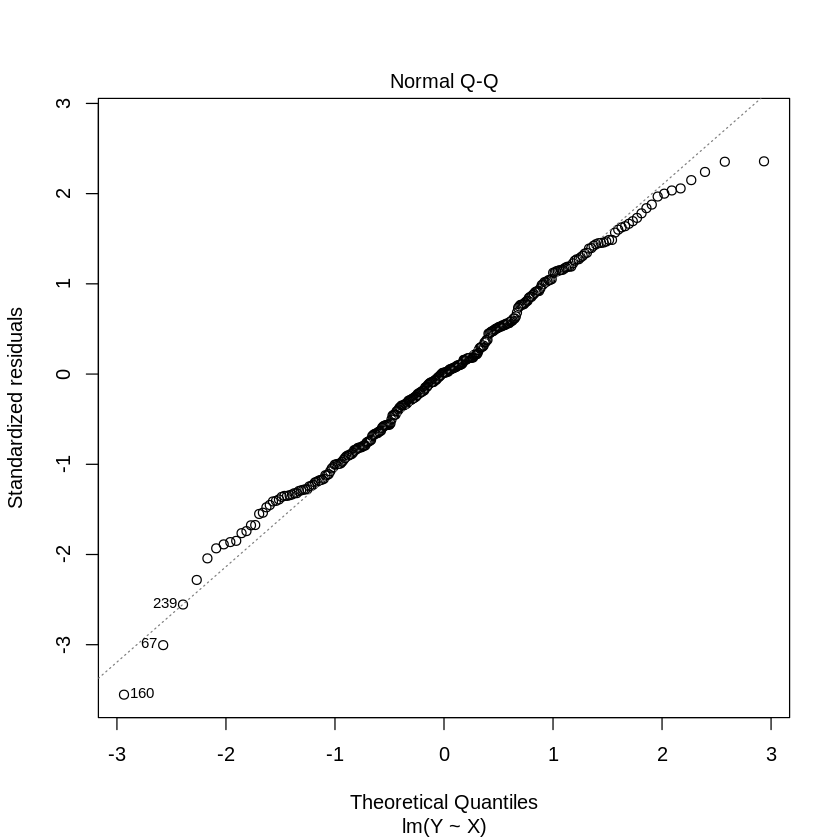

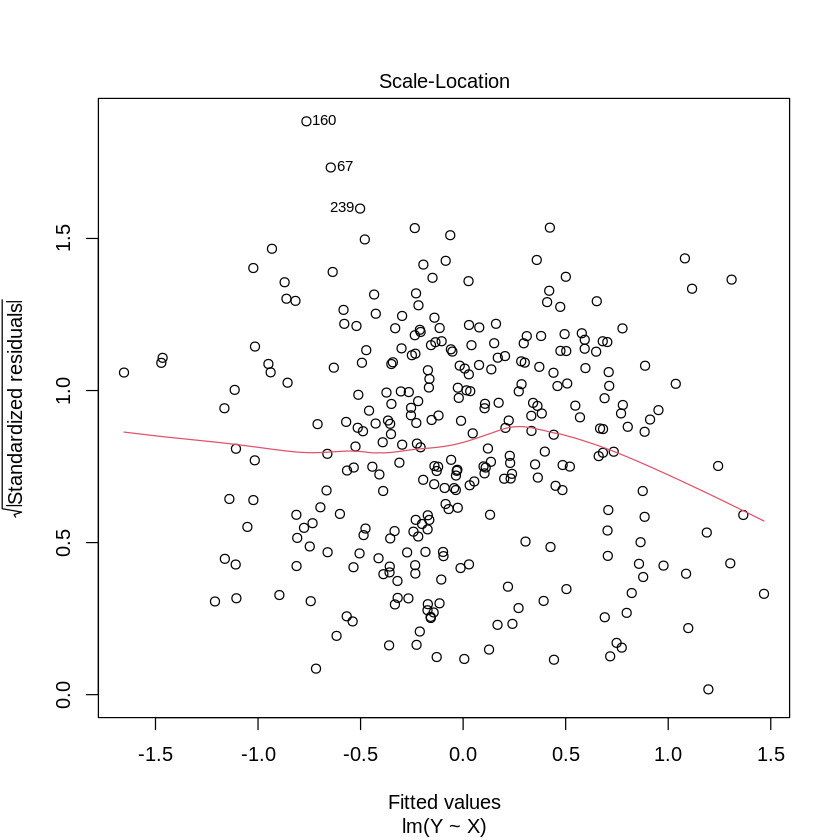

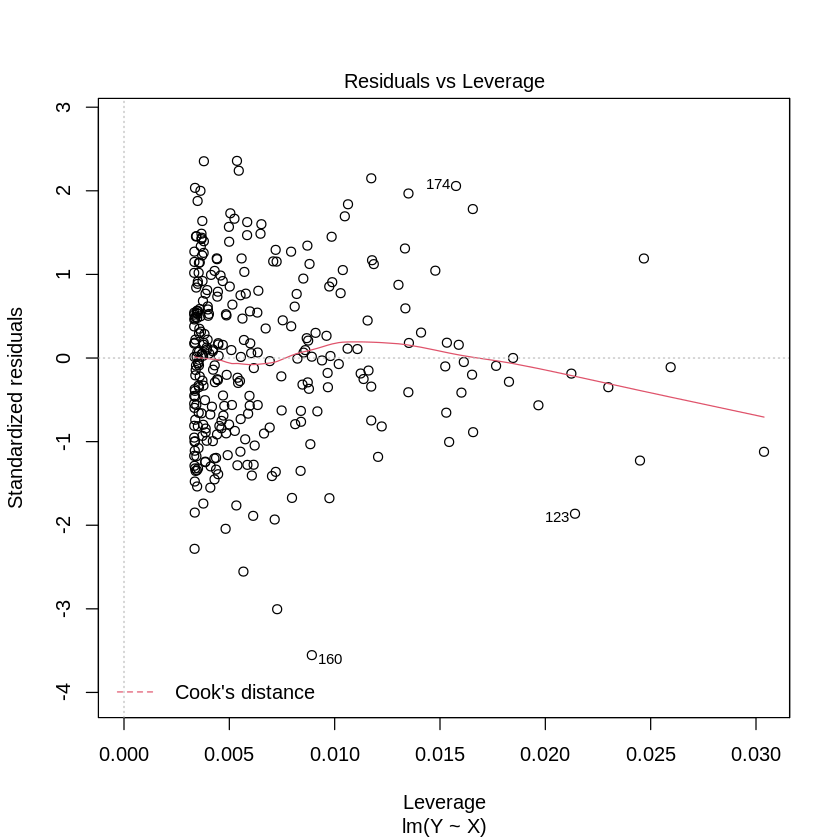

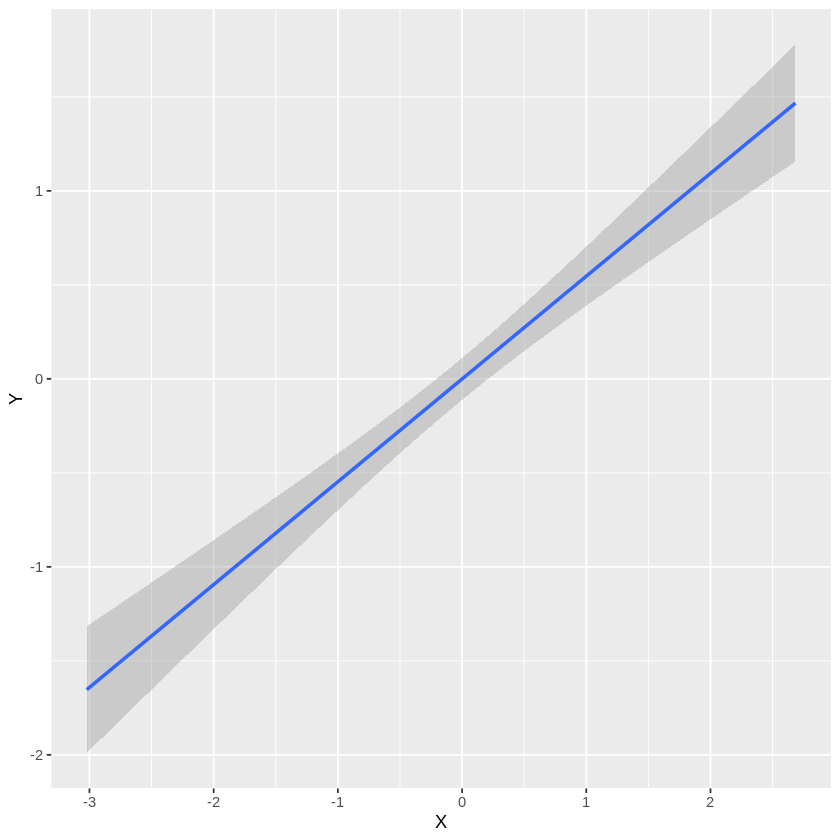

In [64]:
# Linear Non-Gaussian Additive Noise Model

set.seed(1)
n <- 1000
C <- rnorm(n)
E <- 4*C + rnorm(n)
c(mean(E), var(E))
hist(C, breaks=10, xlim=c(-10, 10), freq=FALSE)
hist(4*C, breaks=10,xlim=c(-10, 10), freq=FALSE)
hist(E, breaks=10,xlim=c(-10, 10), freq=FALSE)
joint.density.plot(C, E, Title="Joint Density Plot",
                   contour=TRUE, color=FALSE)


## If Gaussian
X <- rnorm(300, mean=0, sd=1)
Y <- 0.5*X + rnorm(300, mean=0, sd=1)
# hist(X)
# hist(Y)

fit.lm <- lm(Y~X, data.frame(X,Y))
step.model <- stepAIC(fit.lm, direction = "backward", 
                      trace = FALSE)
summary(step.model)
plot(step.model)

ggplot(data.frame(X, Y), aes(x=X, y=Y)) +
#     stat_summary(fun.data=mean_cl_normal) + 
    geom_smooth(method='lm', formula= y~x)

# ggplot(data.frame(X, Y), aes(x=X, y=Y)) +
#     stat_summary(fun.data=mean_cl_normal) + 
#     geom_smooth(method='lm', formula= x~y)





Call:
lm(formula = Y ~ X, data = data.frame(X, Y))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5431 -0.2466 -0.0001  0.2295  0.4728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.56372    0.03310  17.030  < 2e-16 ***
X            0.40885    0.05652   7.234 3.99e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2841 on 298 degrees of freedom
Multiple R-squared:  0.1494,	Adjusted R-squared:  0.1465 
F-statistic: 52.33 on 1 and 298 DF,  p-value: 3.989e-12


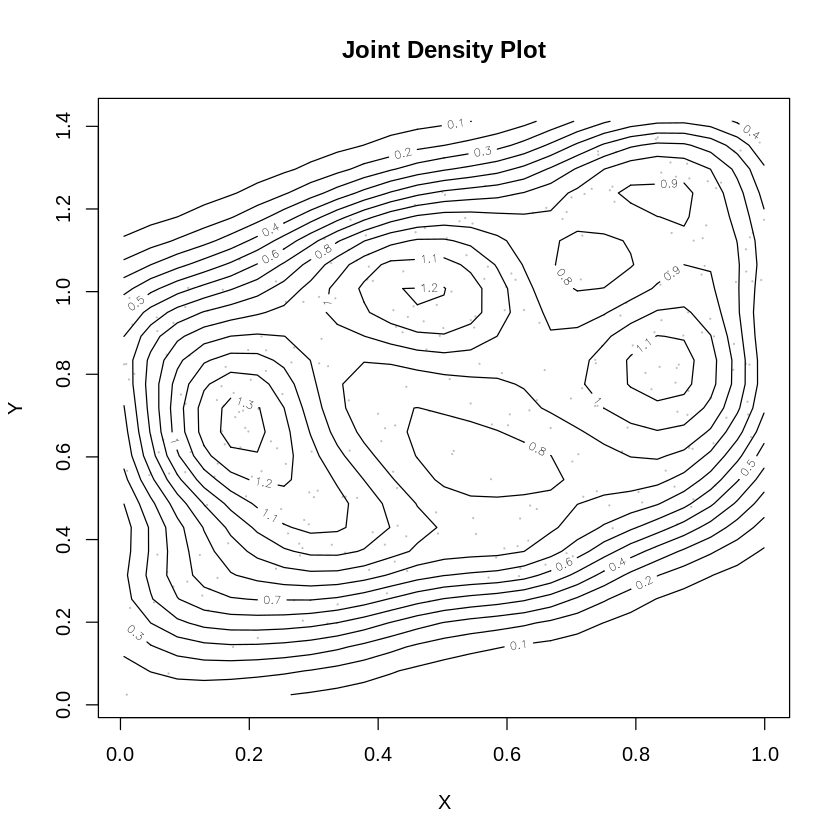

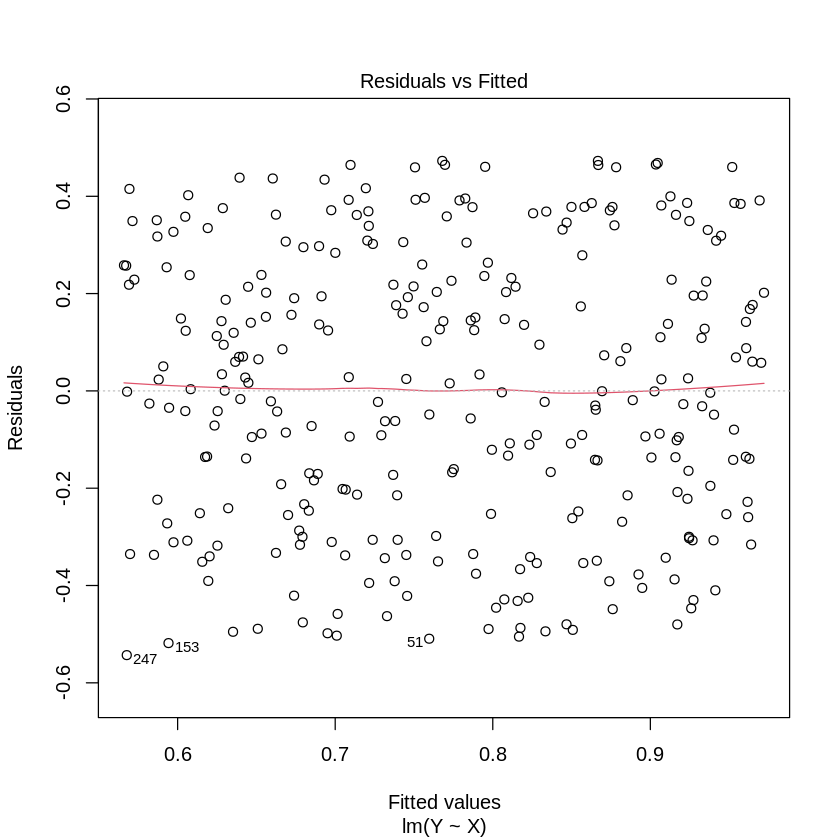

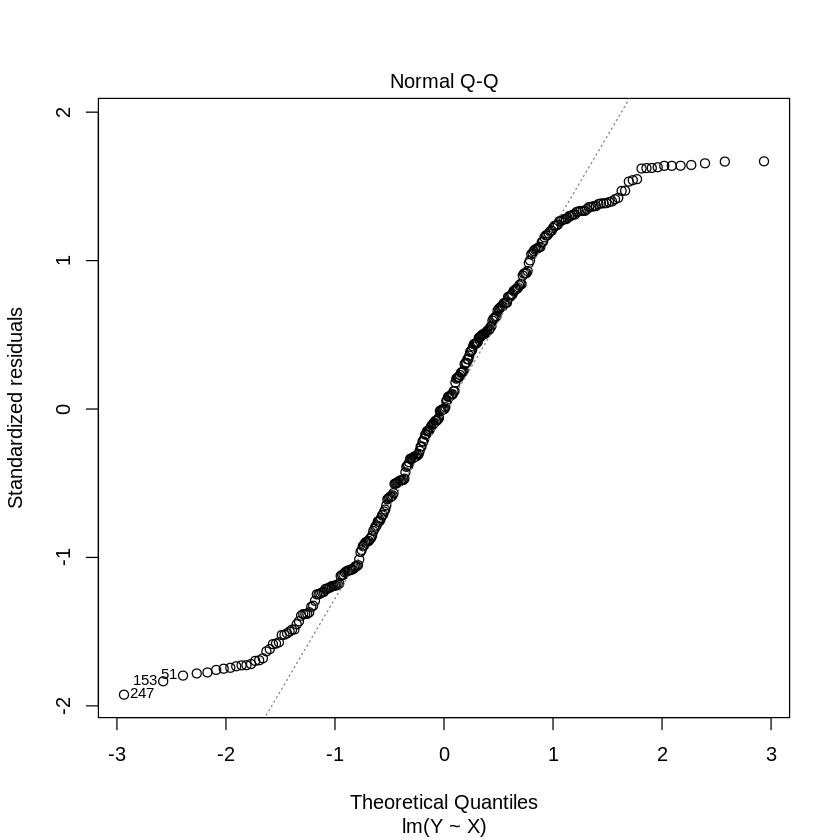

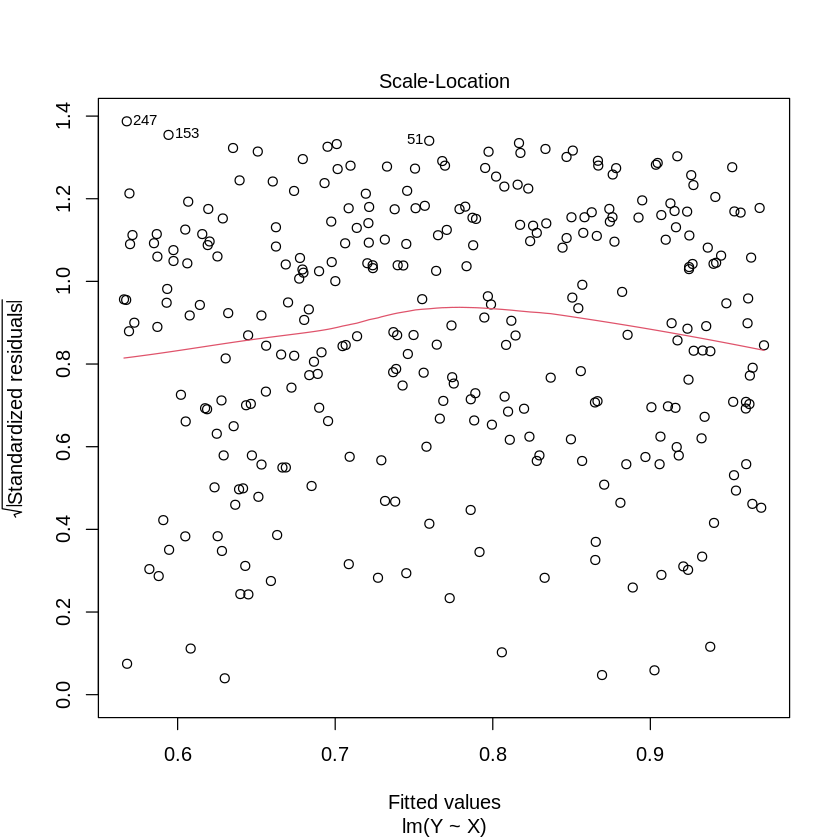

Warning message:
“Removed 300 rows containing missing values (geom_segment).”


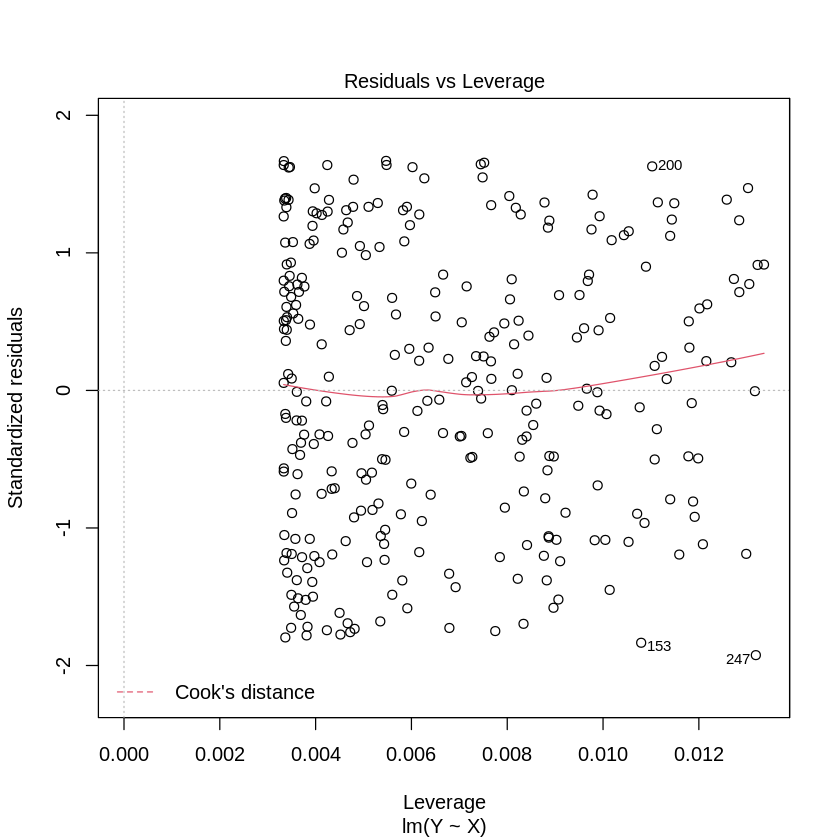

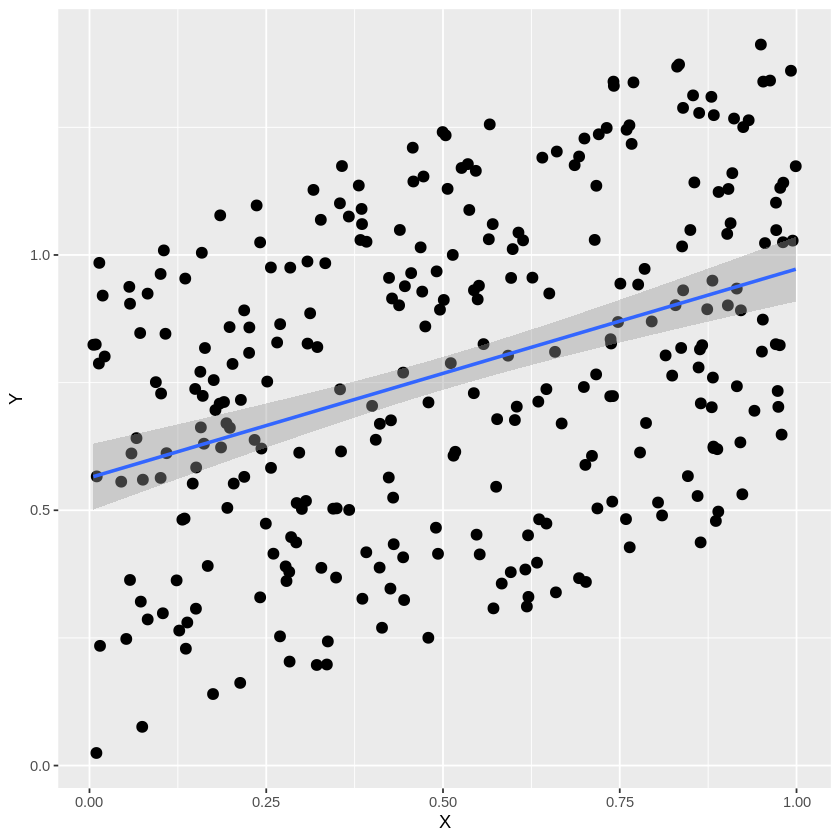

In [67]:
# If X and N_y are uniform
X <- runif(300)
Y <- 0.5*X + runif(300)
# hist(X)
# hist(Y)

joint.density.plot(X, Y, Title="Joint Density Plot",
                   contour=TRUE, color=FALSE)

fit.lm <- lm(Y~X, data.frame(X,Y))
step.model <- stepAIC(fit.lm, direction = "backward", 
                      trace = FALSE)
summary(step.model)
plot(step.model)

ggplot(data.frame(X, Y), aes(x=X, y=Y)) +
    stat_summary(fun.data=mean_cl_normal) + 
    geom_smooth(method='lm', formula= y~x)

Warning message:
“Computation failed in `stat_smooth()`:
singular gradient matrix at initial parameter estimates”
Warning message:
“Removed 300 rows containing missing values (geom_segment).”


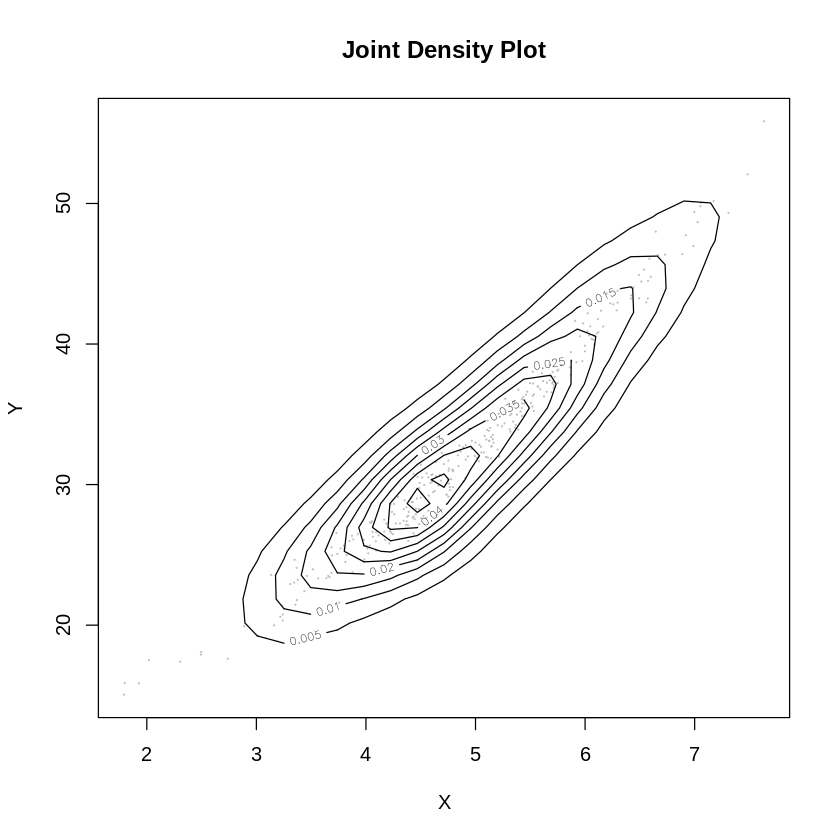

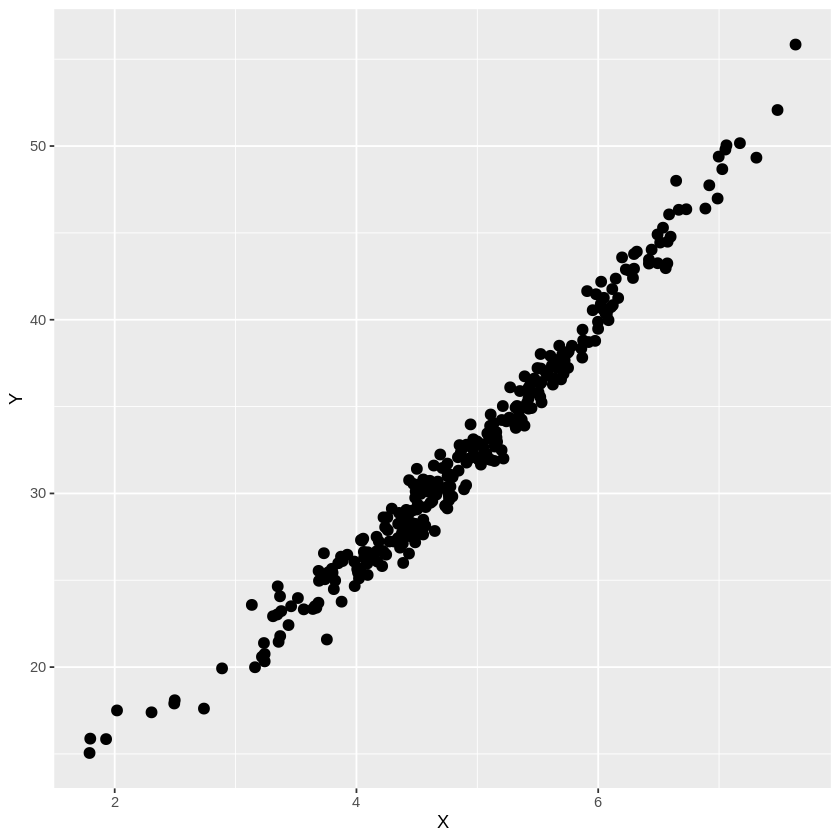

In [68]:
## Non-linear additive noise models

X <- rnorm(300, mean=5)
Y <- 0.5*X^2 + 2*X + rnorm(300, mean=10)
# hist(X)
# hist(Y)

joint.density.plot(X, Y, Title="Joint Density Plot",
                   contour=TRUE, color=FALSE)

ggplot(data.frame(X, Y), aes(x=X, y=Y)) +
    stat_summary(fun.data=mean_cl_normal) + 
    stat_smooth(
        method='nls', 
        formula= y~a*x^b + c*x + d,
        method.args = list(start = list(a = 1, b = 1, c=1, d=10)),
        se = FALSE)

[1] "\nRecreate the example from the book\n"

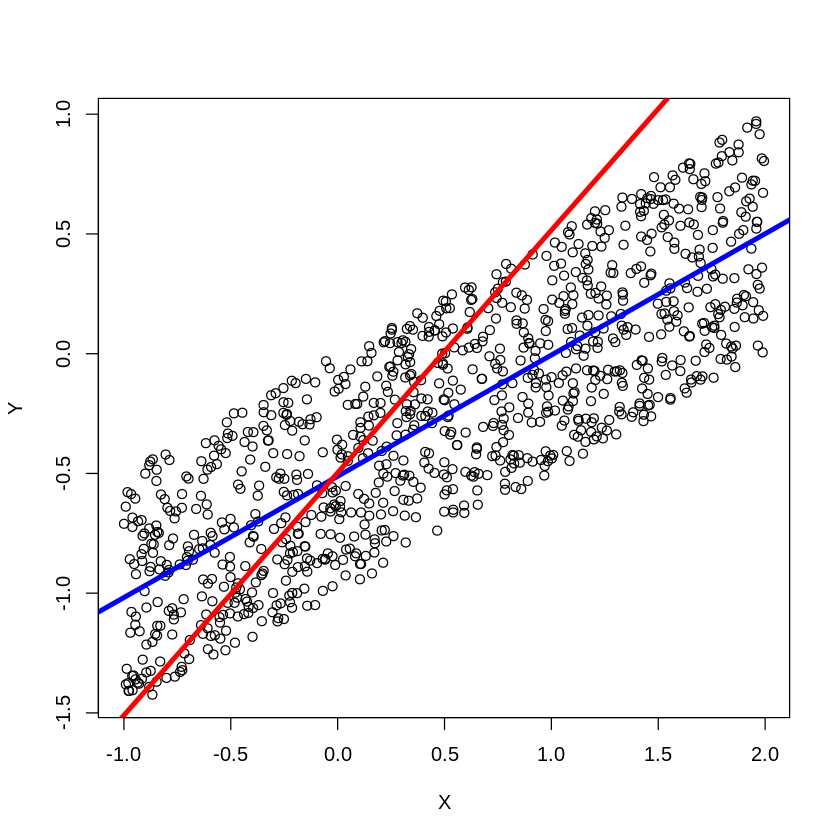

In [69]:
"
Recreate the example from the book
"
# Set X to be a uniform dist
X <- runif(n, min = -1, max = 2)
# Set Y to be 0.5X + some uniform noise
Y <- 0.5*X + runif(n, min = -1, max = 0)
# plot these 
plot(X, Y)
# Fit a linear model between Y ~ X
abline(lm(Y ~ X), lwd = 4,  col="blue")
# Modify X such that it depends on Y with some uniform noise
X_mod <- Y + runif(n, min = -1, max = 0)
# Plot this 
abline(lm(X_mod ~ Y), lwd = 4,  col="red")

[1] "\nCan we make them equal using a constant?\n"

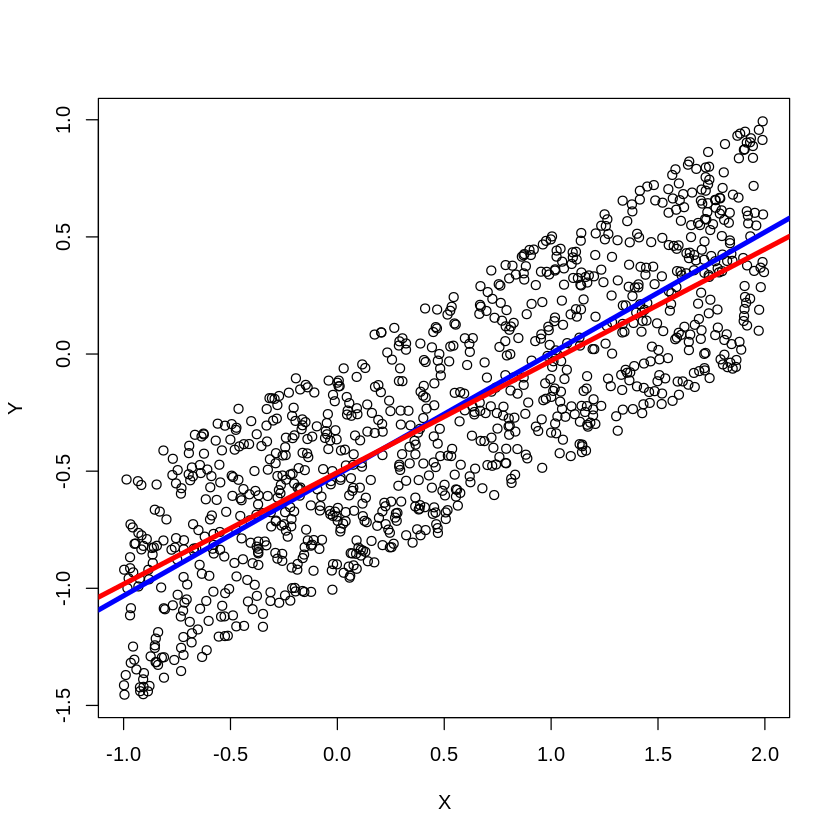

In [70]:
"
Can we make them equal using a constant?
"
# Set X to be a uniform dist
X <- runif(n, min = -1, max = 2)
# Set Y to be 0.5X + some uniform noise
Y <- 0.5*X + runif(n, min = -1, max = 0)
# plot these 
plot(X, Y)
# Fit a linear model between Y ~ X
abline(lm(Y ~ X), lwd = 4,  col="blue")
# Modify X such that it depends on Y with some uniform noise
X_mod <- 0.5*Y + runif(n, min = -1, max = 0)
# Plot this 
abline(lm(X_mod ~ Y), lwd = 4,  col="red")

[1] "\nWhat does this same example look like in the normal case?\n"

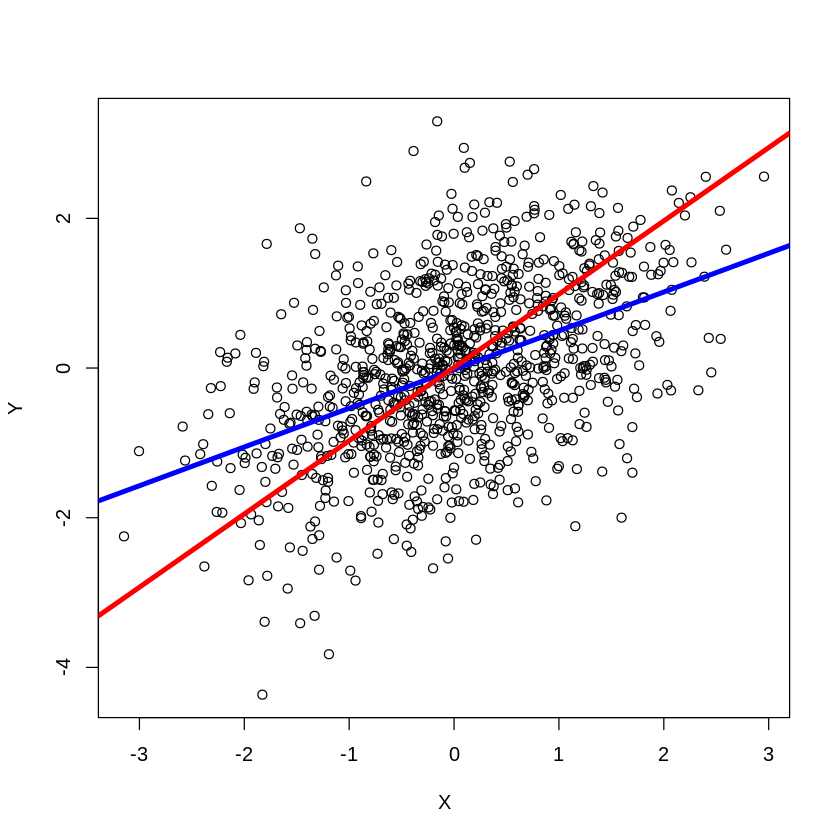

In [71]:
"
What does this same example look like in the normal case?
"
# Set X to be a NORMAL dist
X <- rnorm(n)
# Set Y to be 0.5X + some NORMAL noise
Y <- 0.5*X + rnorm(n)
# plot these 
plot(X, Y)
# Fit a linear model between Y ~ X
abline(lm(Y ~ X), lwd = 4,  col="blue")
# Modify X such that it depends on Y with some NORMAL noise
X_mod <- Y + rnorm(n)
# Plot this 
abline(lm(X_mod ~ Y), lwd = 4,  col="red")

[1] "\nCan we make them equal? \nDoes a constant exist that makes these two lines fall on eachother? \n"

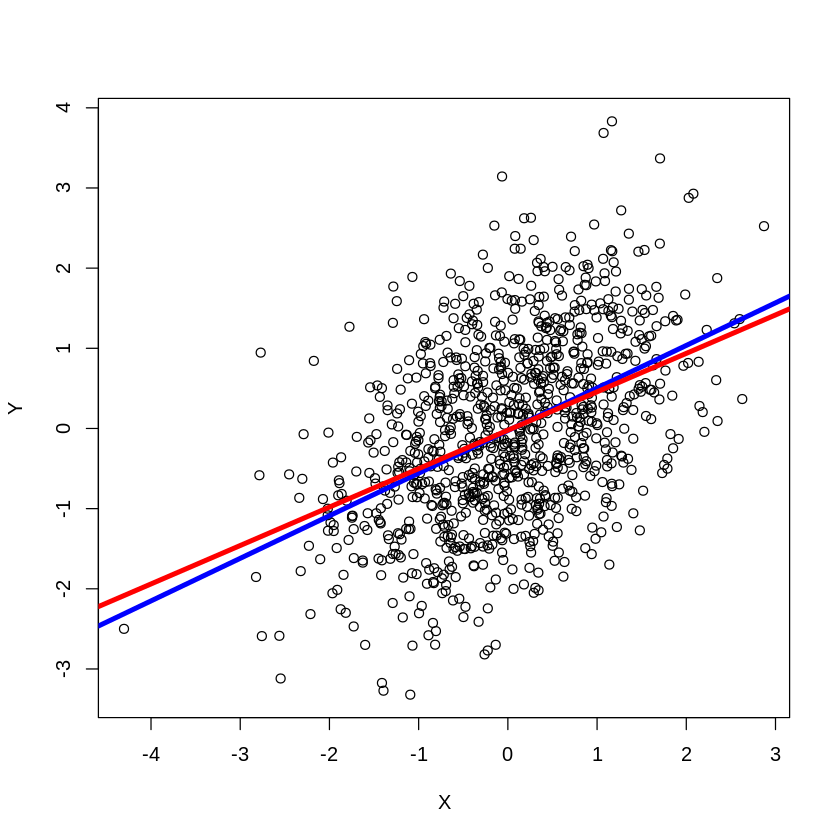

In [72]:
"
Can we make them equal? 
Does a constant exist that makes these two lines fall on eachother? 
"
# Set X to be a NORMAL dist
X <- rnorm(n)
# Set Y to be 0.5X + some NO noise
Y <- 0.5*X + rnorm(n)
# plot these 
plot(X, Y)
# Fit a linear model between Y ~ X
abline(lm(Y ~ X), lwd = 4,  col="blue")
# Modify X such that it depends on Y with some NORMAL noise
X_mod <- 0.5*Y + rnorm(n)
# Plot this rnorm(n)
abline(lm(X_mod ~ Y), lwd = 4,  col="red")

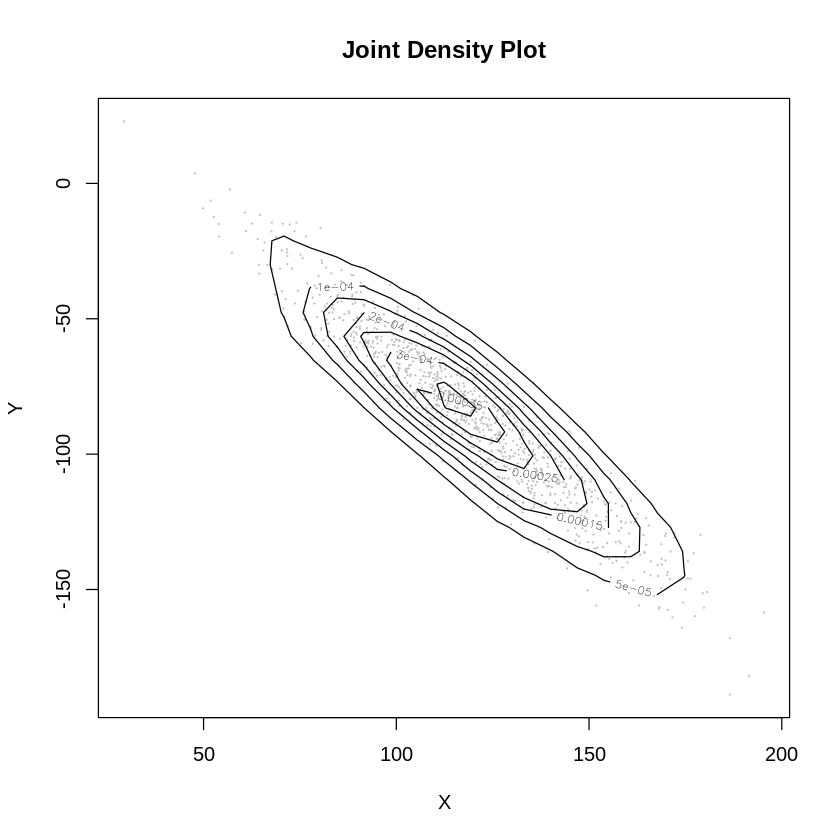

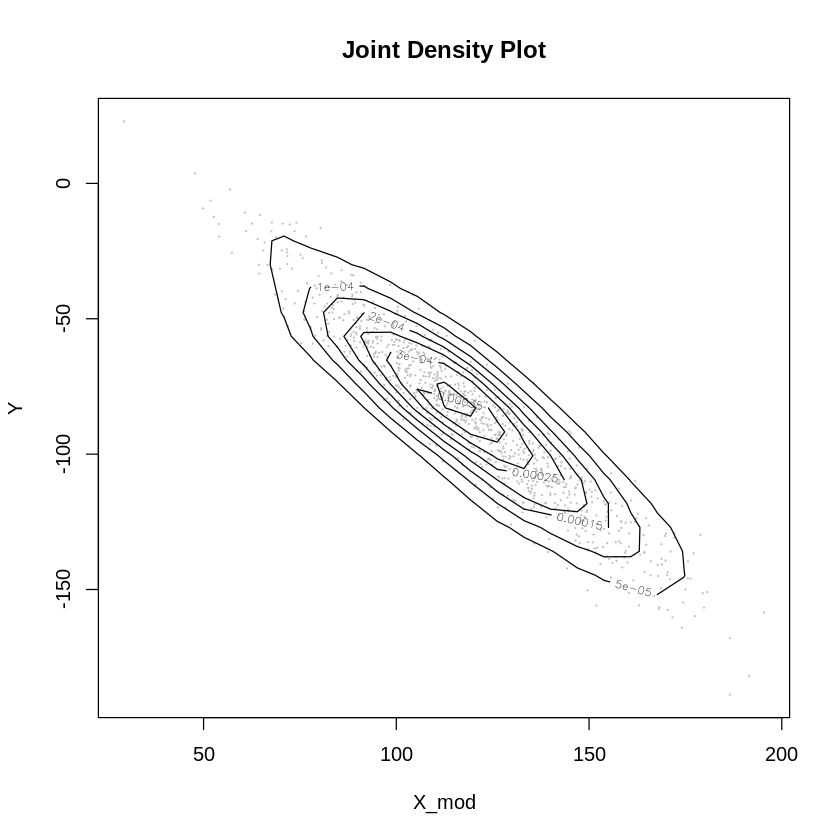

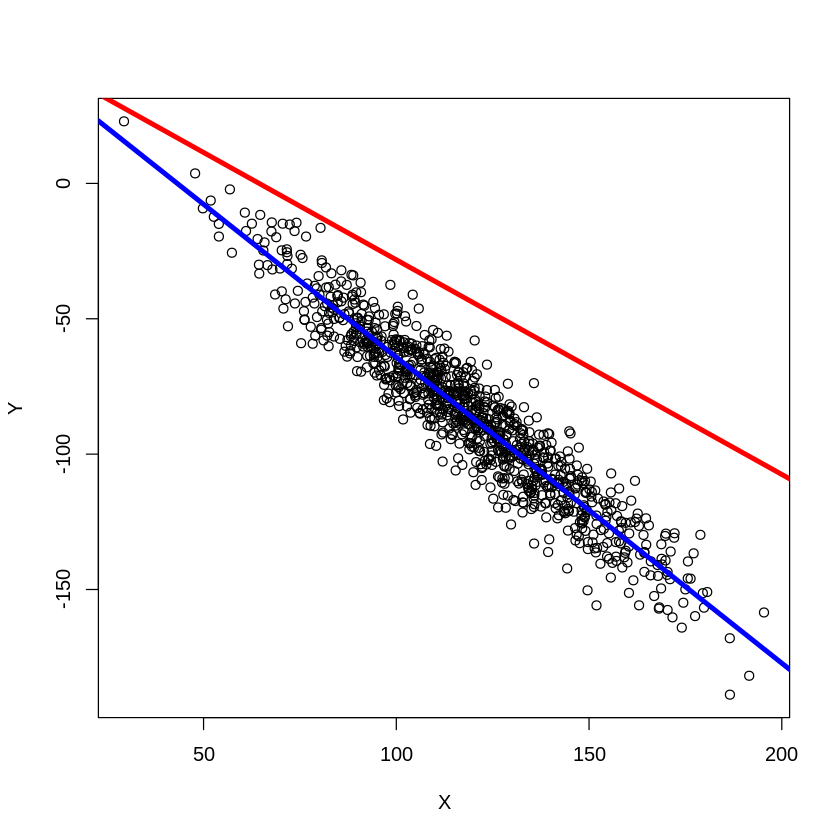

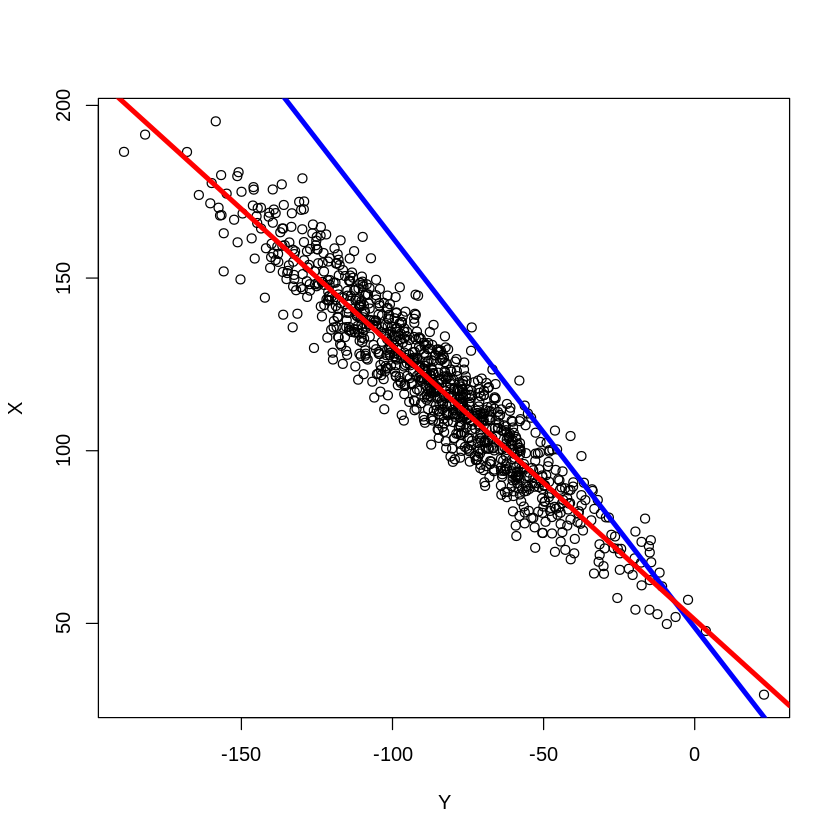

In [36]:
## Non-linear additive noise models
n <- 1000
c <- rnorm(1, 1, 3)
X <- 0.5*rnorm(n, 200, 50) + 20
N_y <- rnorm(n, 50, 10)
Y <- c*(X) + N_y

X_mod <- (((1/c)*(Y - N_y)))
# hist(X)
# hist(Y)

joint.density.plot(X, Y, Title="Joint Density Plot",
                   contour=TRUE, color=FALSE)

joint.density.plot(X_mod, Y, Title="Joint Density Plot",
                   contour=TRUE, color=FALSE)

plot(X, Y)

abline(lm(Y ~ X), lwd = 4,  col="blue")
abline(lm(X_mod ~ Y), lwd = 4,  col="red")

plot(Y, X)
abline(lm(Y ~ X), lwd = 4,  col="blue")
abline(lm(X_mod ~ Y), lwd = 4,  col="red")


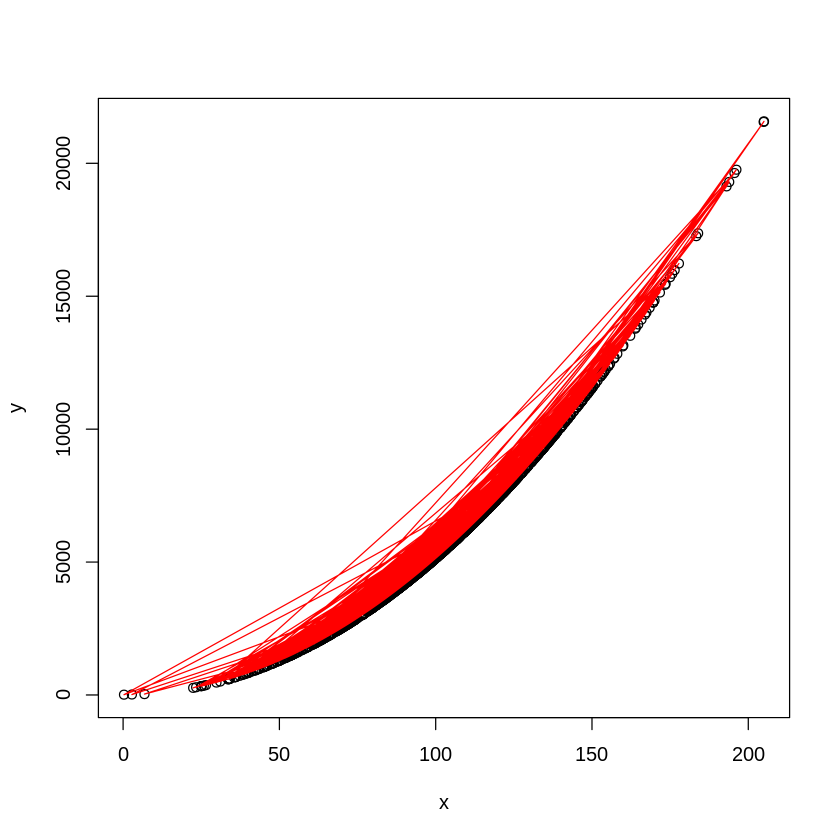

In [124]:

ggplot(data.frame(X, Y), aes(x=X, y=Y)) +
    geom_point() + 
    stat_smooth(
        method='lm', 
        formula=Y~X,)
#         method.args = list(start = list(b=50)))


# ggplot(data.frame(X, Y, X_mod), aes(x=X_mod, y=Y)) +
# # stat_summary(fun.data=mean_cl_normal) +
# stat_smooth(
#         method='lm', 
#         formula= X~Y,
#         method.args = list(start = list(a = 2, b = 0.5)),
#         se = FALSE)

# Trying example with x^2
x <- rnorm(n, 100, 30)
y <- rnorm(1, 2, 1)*x*x + rnorm(n, 10, 2)
plot(x,y)
nonlin_mod<-nls(y~a*x*x + b, start=list(a=0.5,b=1))
lines(x, predict(nonlin_mod),col="red")

[1] 101

[1] 101

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


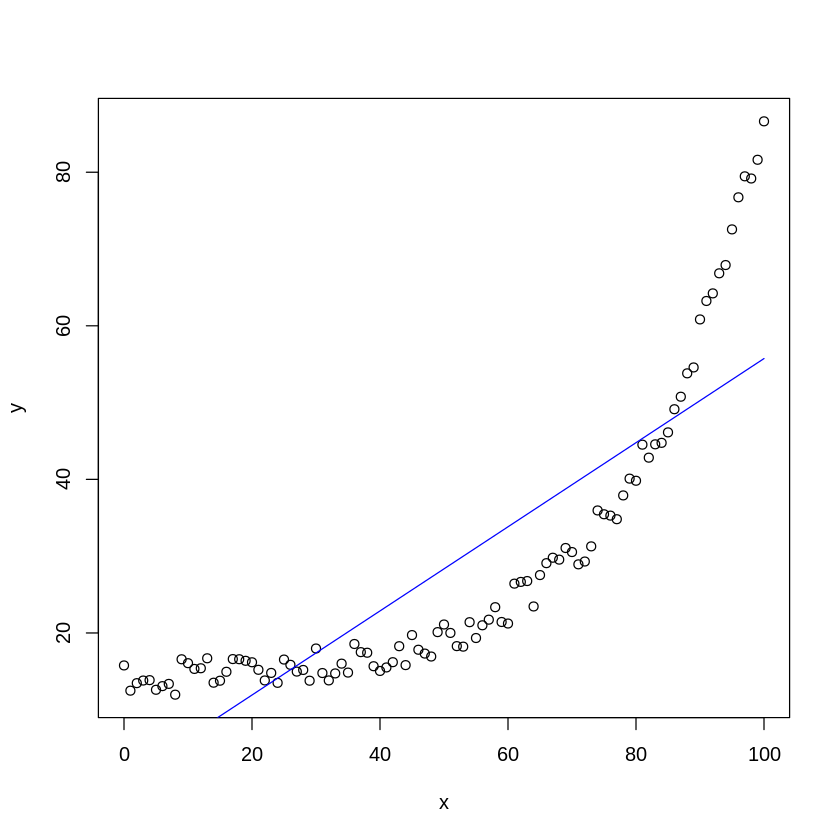

In [161]:
x <- seq(0,100,1)
y <- 0.5*exp(0.05*x)+runif(101,1,6) + 10
x_mod <- (1/0.05) * log((y - runif(101,-1,0)) / 0.5)

length(y)
length(x_mod)

plot(x,y)
nonlin_mod <- lm(y~x)
lines(x,predict(nonlin_mod),col="blue")

back_mod <- lm(x_mod~y)
lines(y, back_mod,col="red")


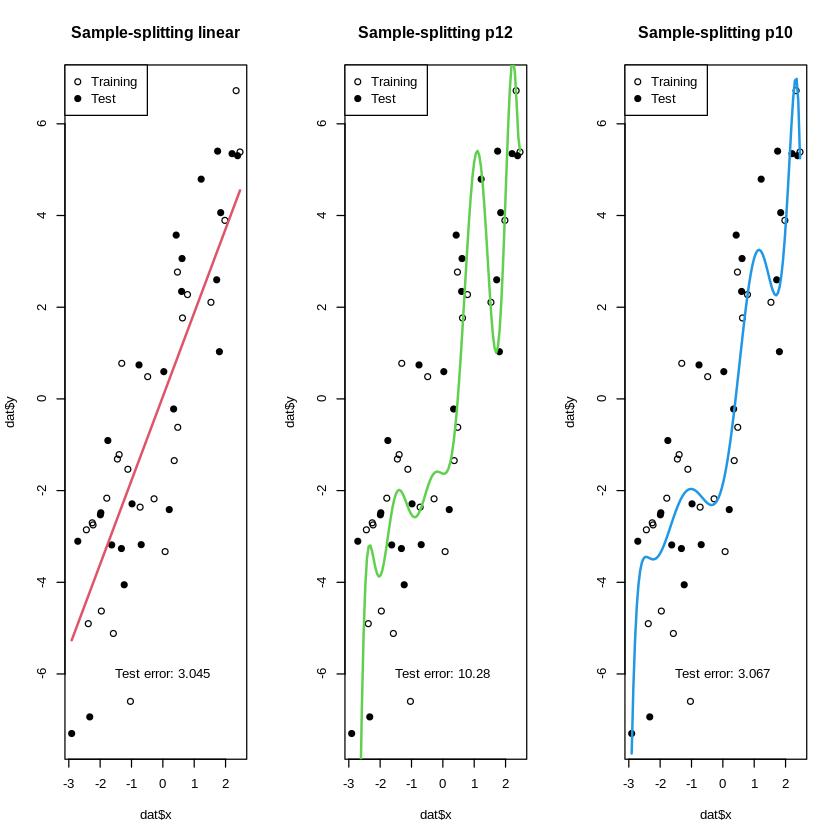

In [15]:
dat = read.table("http://www.stat.cmu.edu/~ryantibs/statcomp/data/xy.dat")
n = nrow(dat)

# Split data in half, randomly
set.seed(0)
inds = sample(rep(1:2, length=n))

dat.tr = dat[inds==1,] # Training data
dat.te = dat[inds==2,] # Test data

# Train on the first half
lm.1 = lm(y ~ x, data=dat.tr)
lm.12 = lm(y ~ poly(x,12), data=dat.tr)
lm.10 = lm(y ~ poly(x,10), data=dat.tr)


# Predict on the second half, evaluate test error
pred.1 = predict(lm.1, data.frame(x=dat.te$x))
pred.12 = predict(lm.12, data.frame(x=dat.te$x))
pred.10 = predict(lm.10, data.frame(x=dat.te$x))

test.err.1 = mean((dat.te$y - pred.1)^2)
test.err.12 = mean((dat.te$y - pred.12)^2)
test.err.10 = mean((dat.te$y - pred.10)^2)

# Plot the results
par(mfrow=c(1,3))
xx = seq(min(dat$x), max(dat$x), length=100)

plot(dat$x, dat$y, pch=c(21,19)[inds], main="Sample-splitting linear")
lines(xx, predict(lm.1, data.frame(x=xx)), col=2, lwd=2)
legend("topleft", legend=c("Training","Test"), pch=c(21,19))
text(0, -6, label=paste("Test error:", round(test.err.1,3)))

plot(dat$x, dat$y, pch=c(21,19)[inds], main="Sample-splitting p12")
lines(xx, predict(lm.12, data.frame(x=xx)), col=3, lwd=2)
legend("topleft", legend=c("Training","Test"), pch=c(21,19))
text(0, -6, label=paste("Test error:", round(test.err.12,3)))

plot(dat$x, dat$y, pch=c(21,19)[inds], main="Sample-splitting p10")
lines(xx, predict(lm.10, data.frame(x=xx)), col=4, lwd=2)
legend("topleft", legend=c("Training","Test"), pch=c(21,19))
text(0, -6, label=paste("Test error:", round(test.err.10,3)))

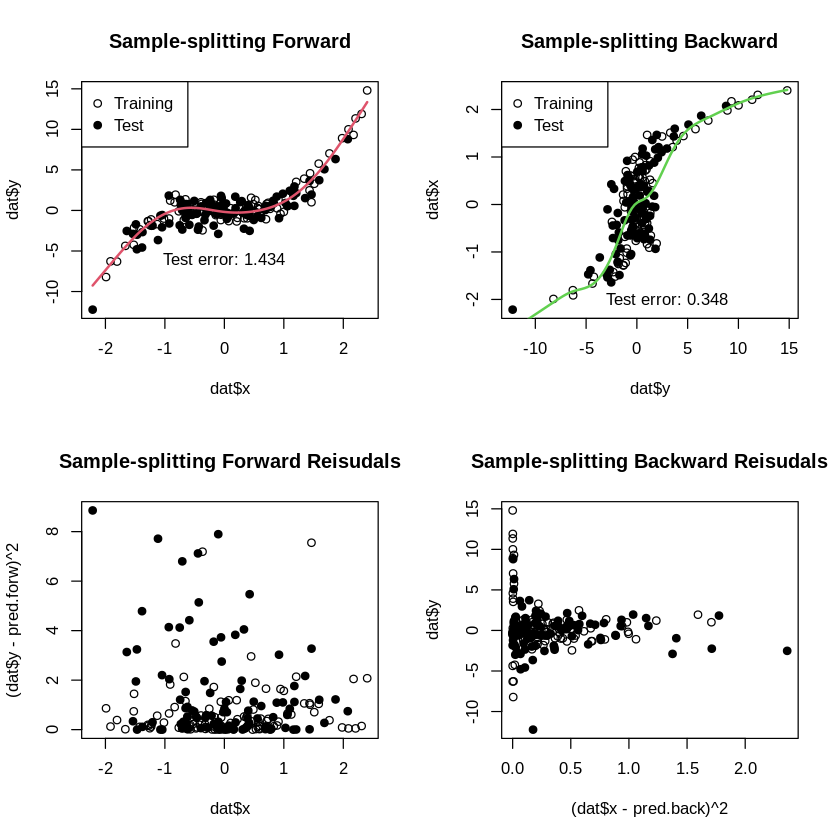

In [74]:
# dat = read.table("http://www.stat.cmu.edu/~ryantibs/statcomp/data/xy.dat")
# dat
set.seed(1)
x <- rnorm(200)
y <- x^3 + rnorm(200)
dat <- data.frame(x=x, y=y)

n = nrow(dat)

# Split data in half, randomly

inds = sample(rep(1:2, length=n))

dat.tr = dat[inds==1,] # Training data
dat.te = dat[inds==2,] # Test data

# Train on the first half
# lm.forw = lm(y ~ x, data=dat.tr)
# lm.back = lm(x ~ y, data=dat.tr)
modelforw.tr <- gam(y ~ s(x), data = dat.tr)
modelback.tr <- gam(x ~ s(y), data = dat.tr)

# Predict on the second half, evaluate test error
pred.forw = predict(modelforw.tr, data.frame(x=dat.te$x))
pred.back = predict(modelback.tr, data.frame(y=dat.te$y))

test.err.forw = mean((dat.te$y - pred.forw)^2)
test.err.back = mean((dat.te$x - pred.back)^2)

# Plot the results
par(mfrow=c(2,2))
xx = seq(min(dat$x), max(dat$x), length=100)
yy = seq(min(dat$y), max(dat$y), length=100)

# forward
plot(dat$x, dat$y, pch=c(21,19)[inds], main="Sample-splitting Forward")
lines(xx, predict(modelforw.tr, data.frame(x=xx)), col=2, lwd=2)
legend("topleft", legend=c("Training","Test"), pch=c(21,19))
text(0, -6, label=paste("Test error:", round(test.err.forw,3)))

# backward
plot(dat$y, dat$x, pch=c(21,19)[inds], main="Sample-splitting Backward")
lines(yy, predict(modelback.tr, data.frame(y=yy)), col=3, lwd=2)
legend("topleft", legend=c("Training","Test"), pch=c(21,19))
text(3, -2, label=paste("Test error:", round(test.err.back,3)))

# forward residuals
pred.forw <- predict(modelforw.tr, data.frame(x=dat$x))
plot(dat$x, (dat$y - pred.forw)^2, pch=c(21,19)[inds], main="Sample-splitting Forward Reisudals")

# backward residuals
pred.back <- predict(modelback.tr, data.frame(y=dat$y))
plot((dat$x - pred.back)^2, dat$y, pch=c(21,19)[inds], main="Sample-splitting Backward Reisudals")

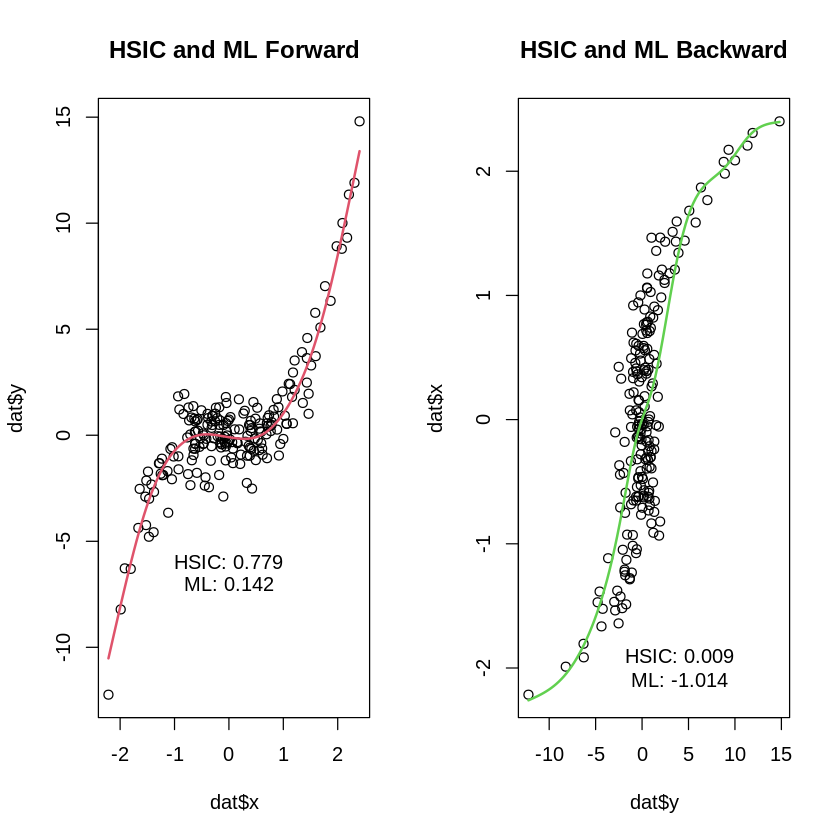

In [61]:
# Fit models
modelforw <- gam(y ~ s(x), data = dat)
modelback <- gam(x ~ s(y), data = dat)

# Test for independence
hsic.forw <- dhsic.test(modelforw$residuals, dat$x)$p.value
hsic.back <- dhsic.test(modelback$residuals, dat$y)$p.value

# likelihoods
ll.forw <- - log(var(dat$x)) - log(var(modelforw$residuals))
ll.back <- - log(var(modelback$residuals)) - log(var(dat$y))

par(mfrow=c(1,2))

plot(dat$x, dat$y, main="HSIC and ML Forward")
lines(xx, predict(modelforw, data.frame(x=xx)), col=2, lwd=2)
text(0, -6, label=paste("HSIC:", round(hsic.forw,3)))
text(0, -7, label=paste("ML:", round(ll.forw,3)))


plot(dat$y, dat$x, main="HSIC and ML Backward")
lines(yy, predict(modelback, data.frame(y=yy)), col=3, lwd=2)
text(4, -1.9, label=paste("HSIC:", round(hsic.back,3)))
text(4, -2.1, label=paste("ML:", round(ll.back,3)))




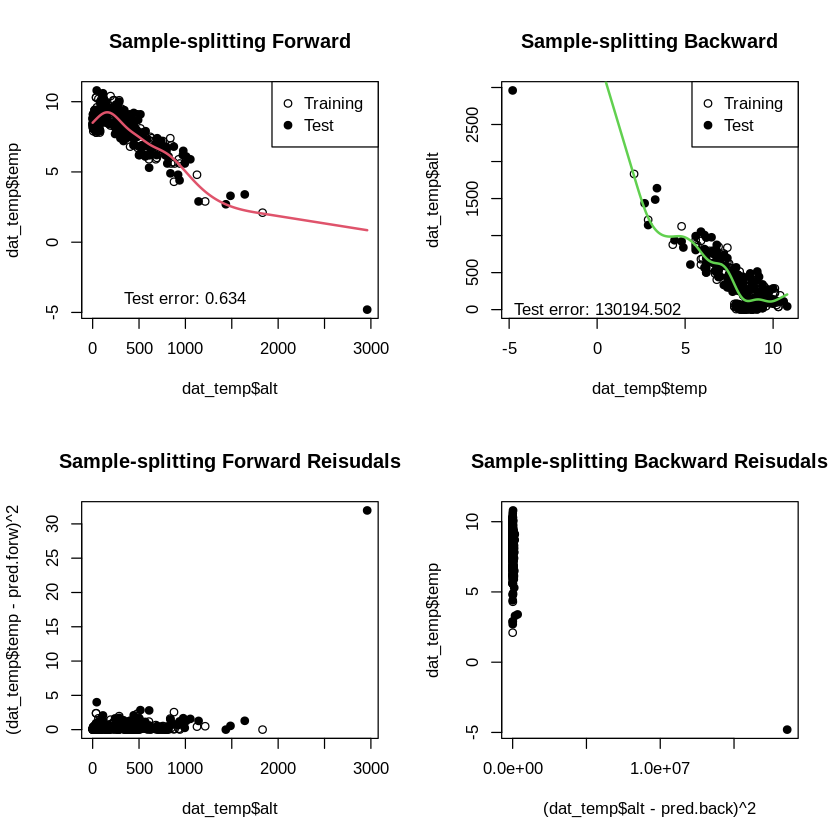

In [96]:
alt <- read.table("https://webdav.tuebingen.mpg.de/cause-effect/pair0001.txt")[-1,]
dat_temp <- data.frame(alt=alt$V1, temp=alt$V2)
n = nrow(dat_temp)

# Split data in half, randomly

inds = sample(rep(1:2, length=n))

dat.tr = dat_temp[inds==1,] # Training data
dat.te = dat_temp[inds==2,] # Test data
# Train on the first half
# lm.forw = lm(y ~ x, data=dat.tr)
# lm.back = lm(x ~ y, data=dat.tr)
modelforw.tr <- gam(temp ~ s(alt), data = dat.tr)
modelback.tr <- gam(alt ~ s(temp), data = dat.tr)

# Predict on the second half, evaluate test error
pred.forw = predict(modelforw.tr, data.frame(alt=dat.te$alt))
pred.back = predict(modelback.tr, data.frame(temp=dat.te$temp))

test.err.forw = mean((dat.te$temp - pred.forw)^2)
test.err.back = mean((dat.te$alt - pred.back)^2)

# Plot the results
par(mfrow=c(2,2))
alt = seq(min(dat_temp$alt), max(dat_temp$alt), length=(n-1)/2)
temp = seq(min(dat_temp$temp), max(dat_temp$temp), length=(n-1)/2)

# forward
plot(dat_temp$alt, dat_temp$temp, pch=c(21,19)[inds], main="Sample-splitting Forward")
lines(alt, predict(modelforw.tr, data.frame(alt=alt)), col=2, lwd=2)
legend("topright", legend=c("Training","Test"), pch=c(21,19))
text(1000, -4, label=paste("Test error:", round(test.err.forw,3)))

# backward
plot(dat_temp$temp, dat_temp$alt, pch=c(21,19)[inds], main="Sample-splitting Backward")
lines(temp, predict(modelback.tr, data.frame(temp=temp)), col=3, lwd=2)
legend("topright", legend=c("Training","Test"), pch=c(21,19))
text(0, 10, label=paste("Test error:", round(test.err.back,3)))

# forward residuals
pred.forw <- predict(modelforw.tr, data.frame(alt=dat_temp$alt))
plot(dat_temp$alt, (dat_temp$temp - pred.forw)^2, pch=c(21,19)[inds], main="Sample-splitting Forward Reisudals")

# backward residuals
pred.back <- predict(modelback.tr, data.frame(temp=dat_temp$temp))
plot((dat_temp$alt - pred.back)^2, dat_temp$temp, pch=c(21,19)[inds], main="Sample-splitting Backward Reisudals")

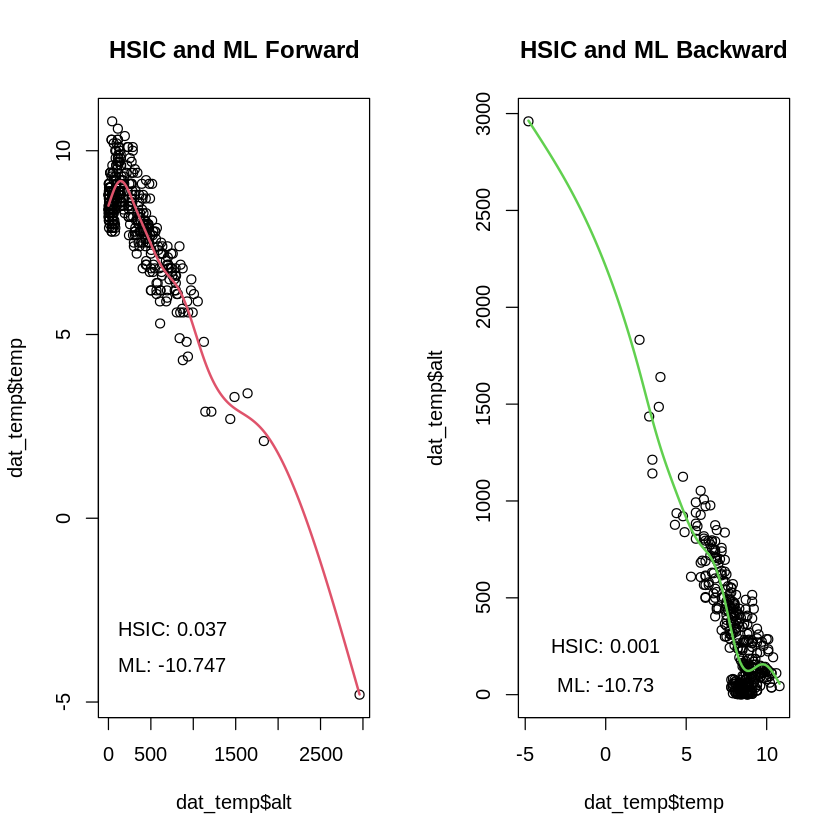

In [102]:
# Fit models
modelforw <- gam(temp ~ s(alt), data = dat_temp)
modelback <- gam(alt ~ s(temp), data = dat_temp)

# Test for independence
hsic.forw <- dhsic.test(modelforw$residuals, dat_temp$alt)$p.value
hsic.back <- dhsic.test(modelback$residuals, dat_temp$temp)$p.value

# likelihoods
ll.forw <- - log(var(dat_temp$alt)) - log(var(modelforw$residuals))
ll.back <- - log(var(modelback$residuals)) - log(var(dat_temp$temp))

par(mfrow=c(1,2))

plot(dat_temp$alt, dat_temp$temp, main="HSIC and ML Forward")
lines(alt, predict(modelforw, data.frame(alt=alt)), col=2, lwd=2)
text(750, -3, label=paste("HSIC:", round(hsic.forw,3)))
text(750, -4, label=paste("ML:", round(ll.forw,3)))


plot(dat_temp$temp, dat_temp$alt, main="HSIC and ML Backward")
lines(temp, predict(modelback, data.frame(temp=temp)), col=3, lwd=2)
text(0, 250, label=paste("HSIC:", round(hsic.back,3)))
text(0, 50, label=paste("ML:", round(ll.back,3)))